In [1]:
import pandas as pd
pd.options.display.max_rows = 10

In [2]:
name1880 = pd.read_csv('/Users/helena/Downloads/pydata-notebook-master/datasets/babynames/yob1880.txt',
                      names = ['name','sex','births'])
print(name1880[:5])

        name sex  births
0       Mary   F    7065
1       Anna   F    2604
2       Emma   F    2003
3  Elizabeth   F    1939
4     Minnie   F    1746


In [7]:
sex_group = name1880.groupby('sex')
for name,group in sex_group:
    print(name)
    print(group)

F
          name sex  births
0         Mary   F    7065
1         Anna   F    2604
2         Emma   F    2003
3    Elizabeth   F    1939
4       Minnie   F    1746
..         ...  ..     ...
937        Ula   F       5
938     Vannie   F       5
939     Verona   F       5
940     Vertie   F       5
941      Wilma   F       5

[942 rows x 3 columns]
M
           name sex  births
942        John   M    9655
943     William   M    9533
944       James   M    5927
945     Charles   M    5348
946      George   M    5126
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[1058 rows x 3 columns]


In [8]:
import numpy as np
print(sex_group.agg(np.size)) # 统计大小

     name  births
sex              
F     942     942
M    1058    1058


In [10]:
# 数据集被分割成了多个文件，将所有数据组装到一个dataframe里面
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = '/Users/helena/Downloads/pydata-notebook-master/datasets/babynames/yob%d.txt'% year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year # add a column
    pieces.append(frame)
names = pd.concat(pieces,ignore_index = True)

In [12]:
print(names)

              name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1690779    Zymaire   M       5  2010
1690780     Zyonne   M       5  2010
1690781  Zyquarius   M       5  2010
1690782      Zyran   M       5  2010
1690783      Zzyzx   M       5  2010

[1690784 rows x 4 columns]


In [13]:
total_name = names.pivot_table('births',index = 'year',columns = 'sex', aggfunc = [np.sum,np.mean])
print(total_name[:5])

         sum                mean            
sex        F       M           F           M
year                                        
1880   90993  110493   96.595541  104.435728
1881   91955  100748   98.033049  101.051153
1882  107851  113687  104.913424  103.445860
1883  112322  104632  106.567362  101.584466
1884  129021  114445  110.086177  101.728889


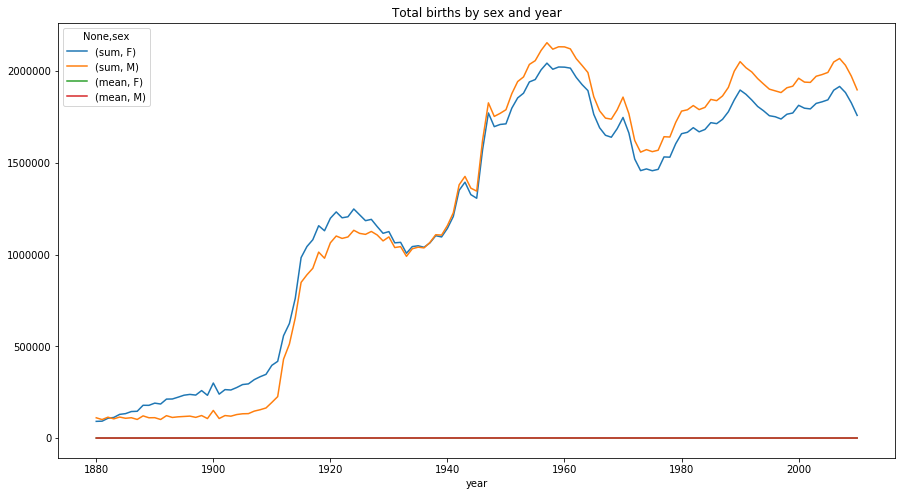

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
total_name.plot(title = 'Total births by sex and year',figsize = (15,8))
plt.show()

In [17]:
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)
print(names)

              name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
...            ...  ..     ...   ...       ...
1690779    Zymaire   M       5  2010  0.000003
1690780     Zyonne   M       5  2010  0.000003
1690781  Zyquarius   M       5  2010  0.000003
1690782      Zyran   M       5  2010  0.000003
1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]


In [18]:
# sanity check
print(names.groupby(['year','sex']).prop.sum())

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64


In [25]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top100 = grouped.apply(get_top1000)
top100.reset_index(inplace = True, drop = True)
print(top100)

             name sex  births  year      prop
0            Mary   F    7065  1880  0.077643
1            Anna   F    2604  1880  0.028618
2            Emma   F    2003  1880  0.022013
3       Elizabeth   F    1939  1880  0.021309
4          Minnie   F    1746  1880  0.019188
...           ...  ..     ...   ...       ...
261872     Camilo   M     194  2010  0.000102
261873     Destin   M     194  2010  0.000102
261874     Jaquan   M     194  2010  0.000102
261875     Jaydan   M     194  2010  0.000102
261876     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]


In [27]:
boys = top100[top100.sex == 'M']
print(boys)

           name sex  births  year      prop
942        John   M    9655  1880  0.087381
943     William   M    9533  1880  0.086277
944       James   M    5927  1880  0.053641
945     Charles   M    5348  1880  0.048401
946      George   M    5126  1880  0.046392
...         ...  ..     ...   ...       ...
261872   Camilo   M     194  2010  0.000102
261873   Destin   M     194  2010  0.000102
261874   Jaquan   M     194  2010  0.000102
261875   Jaydan   M     194  2010  0.000102
261876   Maxton   M     193  2010  0.000102

[130997 rows x 5 columns]


In [28]:
girls = top100[top100.sex == 'F']
print(girls)

             name sex  births  year      prop
0            Mary   F    7065  1880  0.077643
1            Anna   F    2604  1880  0.028618
2            Emma   F    2003  1880  0.022013
3       Elizabeth   F    1939  1880  0.021309
4          Minnie   F    1746  1880  0.019188
...           ...  ..     ...   ...       ...
260872    Violeta   F     250  2010  0.000142
260873     Leilah   F     250  2010  0.000142
260874    Alaysia   F     250  2010  0.000142
260875      Dania   F     249  2010  0.000142
260876     Yadira   F     249  2010  0.000142

[130880 rows x 5 columns]


In [29]:
total_births = top100.pivot_table('births',index='year',columns='name',aggfunc=sum)
print(total_births)

name   Aaden  Aaliyah  Aarav   Aaron  Aarush  Ab  Abagail  Abb  Abbey  Abbie  \
year                                                                           
1880     NaN      NaN    NaN   102.0     NaN NaN      NaN  NaN    NaN   71.0   
1881     NaN      NaN    NaN    94.0     NaN NaN      NaN  NaN    NaN   81.0   
1882     NaN      NaN    NaN    85.0     NaN NaN      NaN  NaN    NaN   80.0   
1883     NaN      NaN    NaN   105.0     NaN NaN      NaN  NaN    NaN   79.0   
1884     NaN      NaN    NaN    97.0     NaN NaN      NaN  NaN    NaN   98.0   
...      ...      ...    ...     ...     ...  ..      ...  ...    ...    ...   
2006     NaN   3737.0    NaN  8279.0     NaN NaN    297.0  NaN  404.0  440.0   
2007     NaN   3941.0    NaN  8914.0     NaN NaN    313.0  NaN  349.0  468.0   
2008   955.0   4028.0  219.0  8511.0     NaN NaN    317.0  NaN  344.0  400.0   
2009  1265.0   4352.0  270.0  7936.0     NaN NaN    296.0  NaN  307.0  369.0   
2010   448.0   4628.0  438.0  7374.0   2

In [41]:
total_births.fillna(0, inplace=True)
print(total_births)
print(total_births.info())

name   Aaden  Aaliyah  Aarav   Aaron  Aarush   Ab  Abagail  Abb  Abbey  Abbie  \
year                                                                            
1880     0.0      0.0    0.0   102.0     0.0  0.0      0.0  0.0    0.0   71.0   
1881     0.0      0.0    0.0    94.0     0.0  0.0      0.0  0.0    0.0   81.0   
1882     0.0      0.0    0.0    85.0     0.0  0.0      0.0  0.0    0.0   80.0   
1883     0.0      0.0    0.0   105.0     0.0  0.0      0.0  0.0    0.0   79.0   
1884     0.0      0.0    0.0    97.0     0.0  0.0      0.0  0.0    0.0   98.0   
...      ...      ...    ...     ...     ...  ...      ...  ...    ...    ...   
2006     0.0   3737.0    0.0  8279.0     0.0  0.0    297.0  0.0  404.0  440.0   
2007     0.0   3941.0    0.0  8914.0     0.0  0.0    313.0  0.0  349.0  468.0   
2008   955.0   4028.0  219.0  8511.0     0.0  0.0    317.0  0.0  344.0  400.0   
2009  1265.0   4352.0  270.0  7936.0     0.0  0.0    296.0  0.0  307.0  369.0   
2010   448.0   4628.0  438.0

In [31]:
subset = total_births[['John','Harry','Mary','Marilyn']]

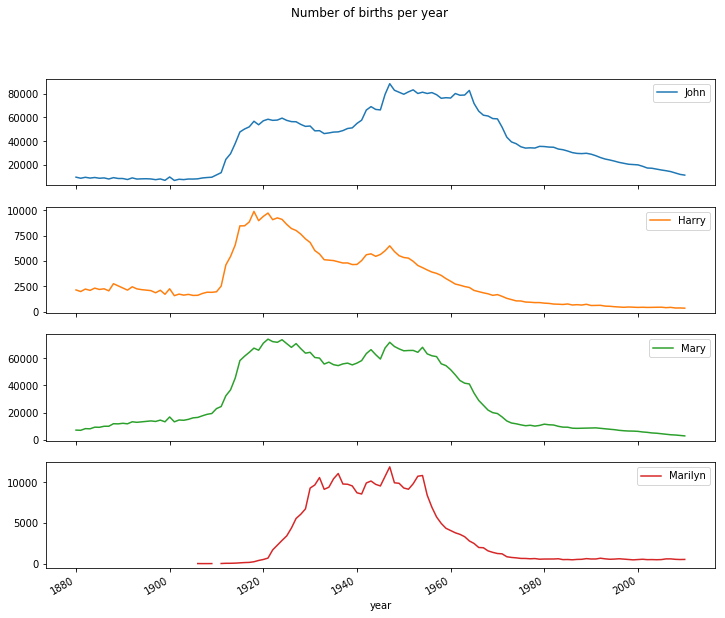

In [32]:
subset.plot(subplots=True,figsize=(12,10),grid=False,
           title = 'Number of births per year')
plt.show()

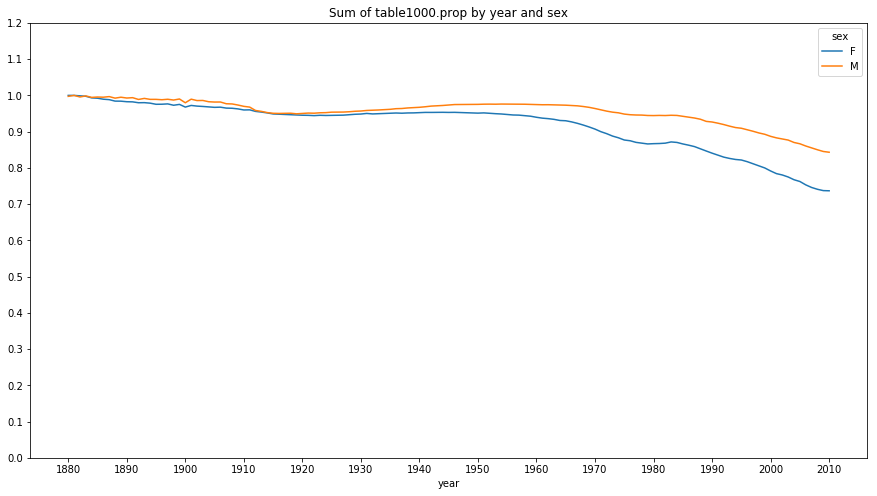

In [33]:
import numpy as np
table = top100.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
          yticks = np.linspace(0,1.2,13),xticks = np.arange(1880,2020,10),
          figsize = (15,8))
plt.show()

In [34]:
df = boys[boys.year == 2010]
print(df)

           name sex  births  year      prop
260877    Jacob   M   21875  2010  0.011523
260878    Ethan   M   17866  2010  0.009411
260879  Michael   M   17133  2010  0.009025
260880   Jayden   M   17030  2010  0.008971
260881  William   M   16870  2010  0.008887
...         ...  ..     ...   ...       ...
261872   Camilo   M     194  2010  0.000102
261873   Destin   M     194  2010  0.000102
261874   Jaquan   M     194  2010  0.000102
261875   Jaydan   M     194  2010  0.000102
261876   Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]


In [35]:
prop_cumsum = df.sort_values(by = 'prop',ascending = False).prop.cumsum()

In [36]:
print(prop_cumsum[:10])

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64


In [37]:
print(prop_cumsum.searchsorted(0.5))

[116]


In [38]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop',ascending = False).prop.cumsum()
print(in1900[-10:])

41853    0.979223
41852    0.979277
41851    0.979330
41850    0.979383
41849    0.979436
41848    0.979489
41847    0.979542
41846    0.979595
41845    0.979648
41876    0.979702
Name: prop, dtype: float64


In [39]:
print(in1900.searchsorted(0.5))

[24]


In [43]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by='prop', ascending = False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top100.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
print(diversity)

sex       F      M
year              
1880   [38]   [14]
1881   [38]   [14]
1882   [38]   [15]
1883   [39]   [15]
1884   [39]   [16]
...     ...    ...
2006  [209]   [99]
2007  [223]  [103]
2008  [234]  [109]
2009  [241]  [114]
2010  [246]  [117]

[131 rows x 2 columns]


In [44]:
diversity = diversity.astype('float')
print(diversity)

sex       F      M
year              
1880   38.0   14.0
1881   38.0   14.0
1882   38.0   15.0
1883   39.0   15.0
1884   39.0   16.0
...     ...    ...
2006  209.0   99.0
2007  223.0  103.0
2008  234.0  109.0
2009  241.0  114.0
2010  246.0  117.0

[131 rows x 2 columns]


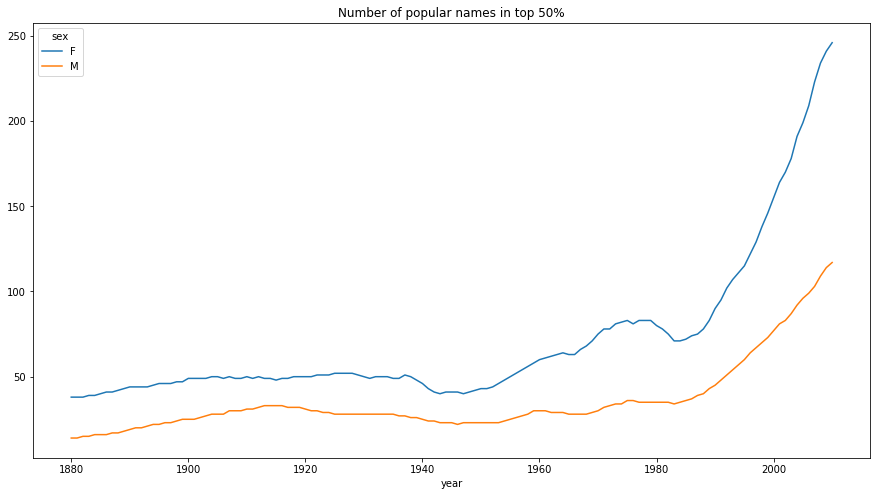

In [45]:
diversity.plot(title = 'Number of popular names in top 50%', figsize = (15,8))
plt.show()

In [46]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births',index = last_letters,
                         columns = ['sex','year'],aggfunc=sum)
print(type(last_letters))

<class 'pandas.core.series.Series'>


In [47]:
print(last_letters[:5])

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object


In [48]:
print(table.head())

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c              

In [49]:
subtable = table.reindex(columns = [1910,1960,2010],level='year')
print(subtable)

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
...               ...       ...       ...      ...       ...       ...
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

[26 r

In [50]:
print(subtable.sum())

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64


In [51]:
letter_prop = subtable / subtable.sum()
print(letter_prop)

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0

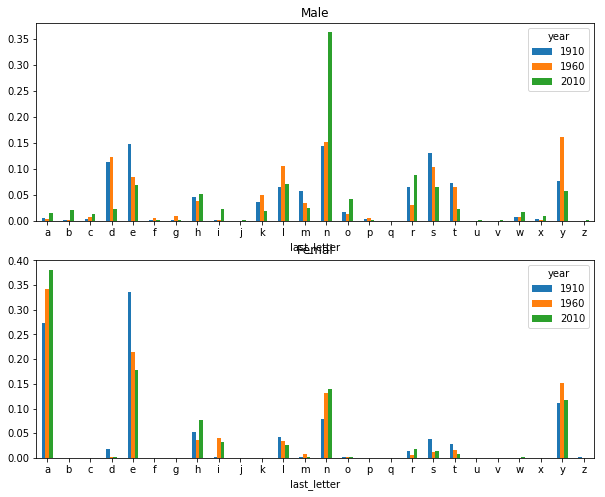

In [52]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1, figsize=(10,8))
letter_prop['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, ax = axes[1], title = 'Femal')
plt.show()

In [53]:
letter_prop = table / table.sum()
print(letter_prop.head())

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345587  0.343440  0.338764  0.341251  0.338550  0.341270   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007211  0.007100  0.006478   
e            0.366819  0.370616  0.374582  0.373159  0.372722  0.372896   

sex                                                    ...            M  \
year             1886      1887      1888      1889    ...         2001   
last_letter                                            ...                
a            0.339703  0.335258  0.332764  0.328706    ...     0.020162   
b                 NaN       NaN       NaN       NaN    ...     0.026256   
c                 NaN   

In [58]:
df1 = letter_prop.loc[['d','n','y'],'M']
df1 = df1.T
print(df1)

last_letter         d         n         y
year                                     
1880         0.083055  0.153213  0.075760
1881         0.083247  0.153214  0.077451
1882         0.085340  0.149560  0.077537
1883         0.084066  0.151646  0.079144
1884         0.086120  0.149915  0.080405
...               ...       ...       ...
2006         0.025075  0.351666  0.060338
2007         0.024451  0.358274  0.059634
2008         0.023574  0.361101  0.060342
2009         0.023398  0.362523  0.057223
2010         0.023387  0.362771  0.058168

[131 rows x 3 columns]


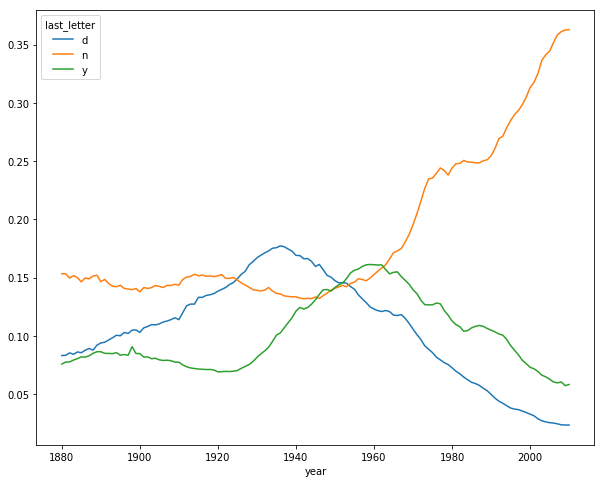

In [59]:
df1.plot(figsize = (10,8))
plt.show()